## **Inspect Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

import tdmms.tdmcoco as tdmcoco

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [2]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils
from bep.dataset import bepDataset

### **Load data**

In [4]:
dataset = 'data_afm'

In [5]:
utils.create_dir_setup((0.8, 0.1, 0.1), dataset, True)

Creating directories from batches
Found batches: batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8, batch9, batchsplit
Total image count: 262
Copying images
Checking image counts
Creating and writing annotation files


In [6]:
utils.check_dir_setup((0.8, 0.1, 0.1), dataset, True)

train, val, test = utils.load_train_val_datasets(dataset, use_bs=True)

print("BEP Train NbSe2 images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("BEP Val NbSe2 images: {} | Classes: {}".format(len(val.image_ids), val.class_names))
print("BEP Test NbSe2 images: {} | Classes: {}".format(len(test.image_ids), test.class_names))

Directory setup correctly
BEP Train NbSe2 images: 210 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Val NbSe2 images: 26 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Test NbSe2 images: 26 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


In [22]:
bs_split = bepDataset()
bs_split.load_dir(os.path.join(ROOT_DIR, dataset), 'batchsplit', reload_annotations=False)
bs_split.prepare()

print("BEP Split It NbSe2 images: {} | Classes: {}".format(len(bs_split.image_ids), bs_split.class_names))

inspect = bepDataset()
inspect.load_dir(os.path.join(ROOT_DIR, dataset), 'batch9', reload_annotations=False)
inspect.prepare()

print("BEP Inspect NbSe2 images: {} | Classes: {}".format(len(inspect.image_ids), inspect.class_names))

BEP Split It NbSe2 images: 60 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Inspect NbSe2 images: 4 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [7]:
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3 + 0 # thin, few, thick, massive
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241128-210317_nbse2_wte2_True_83_8__0100.h5')
# BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241205-181216_nbse2_ext_afm_hum_wte2_False_99_4__0117.h5')


model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\weights\20241128-210317_nbse2_wte2_True_83_8__0100.h5


### **Run Model**

In [8]:
run_model = utils.runModel(model_NbSe2, config, plot_size=15)

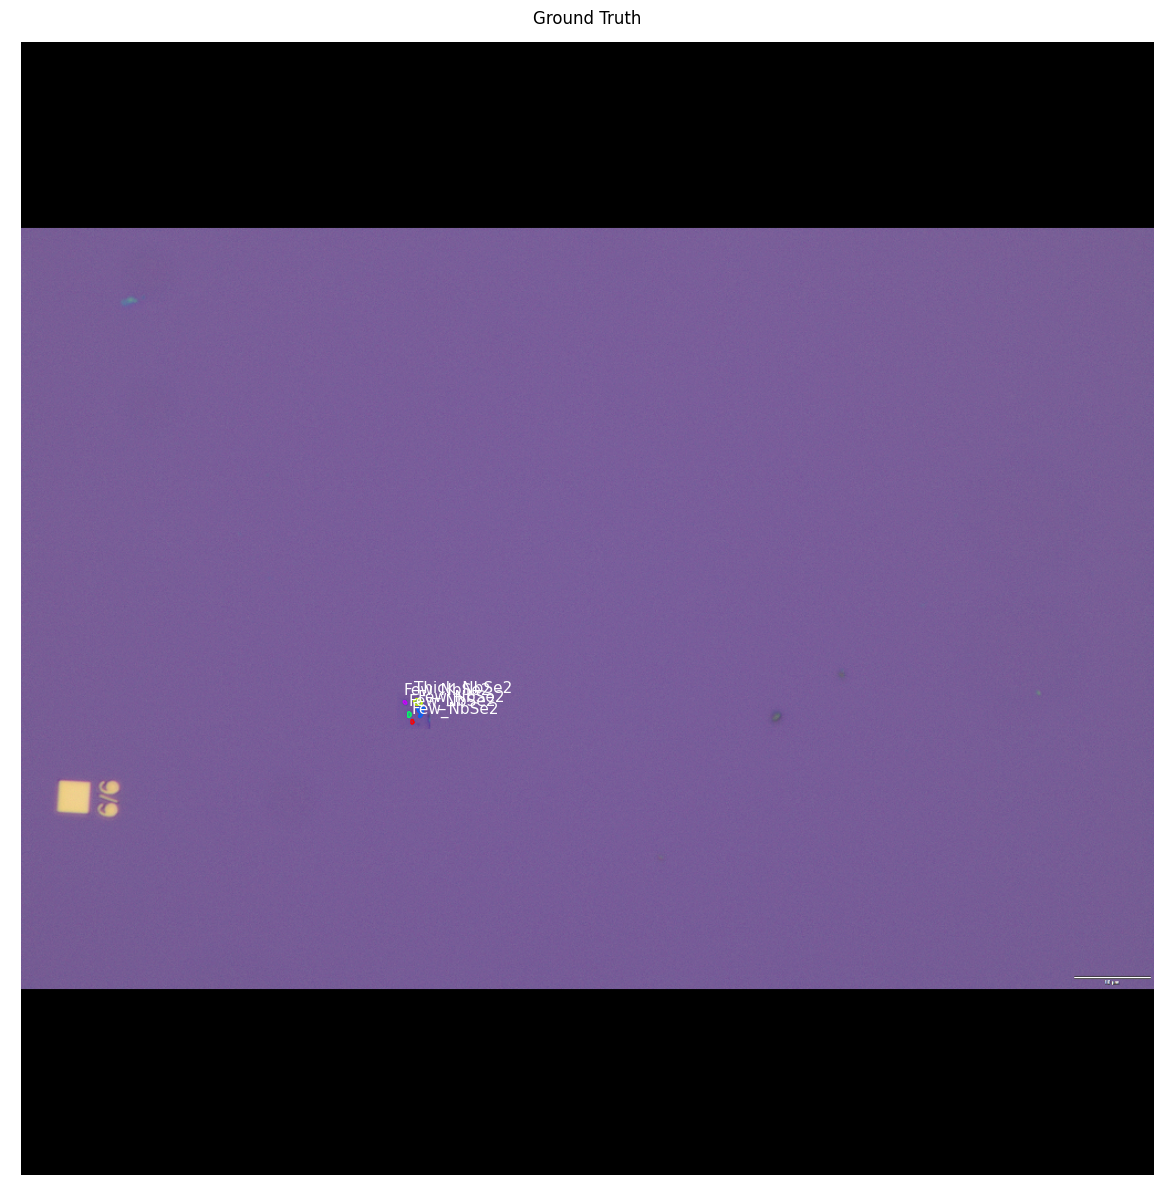

In [11]:
run_model.gt(dataset=train, rand=True, show_bbox=False)